In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.manifold import TSNE

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Iris.csv')
df.head()

Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Cleaning data
print("Missing values:", df.isnull().sum())
df = df.dropna()
df.drop(columns=['Id'], inplace=True)
df.head()

Missing values: Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Encode target variable
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

#Define features and target
X = df.drop(['Species'], axis=1)
y = df['Species']

#Outlier removal using IQR method
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X = X[mask]
y = y[mask]

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

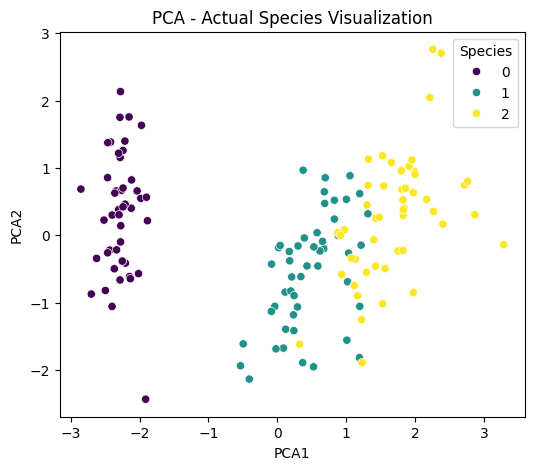

In [16]:
#Dimensionality Reduction using PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Combine for plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Species'] = y.reset_index(drop=True)

#Visualize PCA
plt.figure(figsize=(6, 5))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Species', palette='viridis')
plt.title("PCA - Actual Species Visualization")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


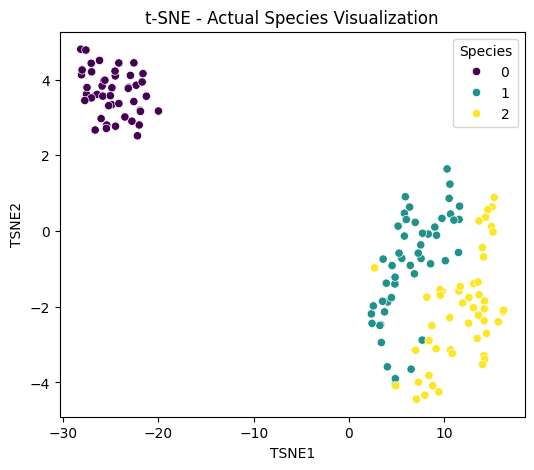

In [17]:
#Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

#Combine for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Species'] = y.reset_index(drop=True)

#Visualize t-SNE
plt.figure(figsize=(6, 5))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Species', palette='viridis')
plt.title("t-SNE - Actual Species Visualization")
plt.show()


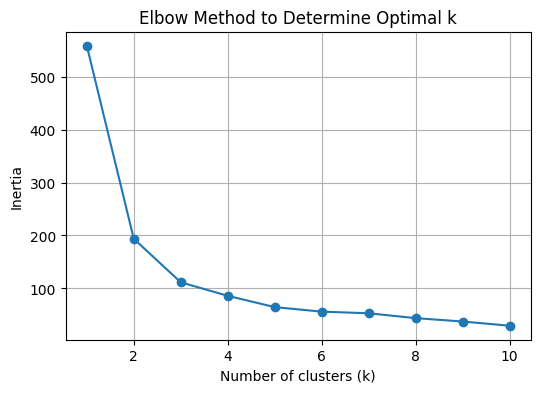

In [20]:
#Elbow Method to choose optimal k
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Using PCA-transformed data
    inertia.append(kmeans.inertia_)

#Plot the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)

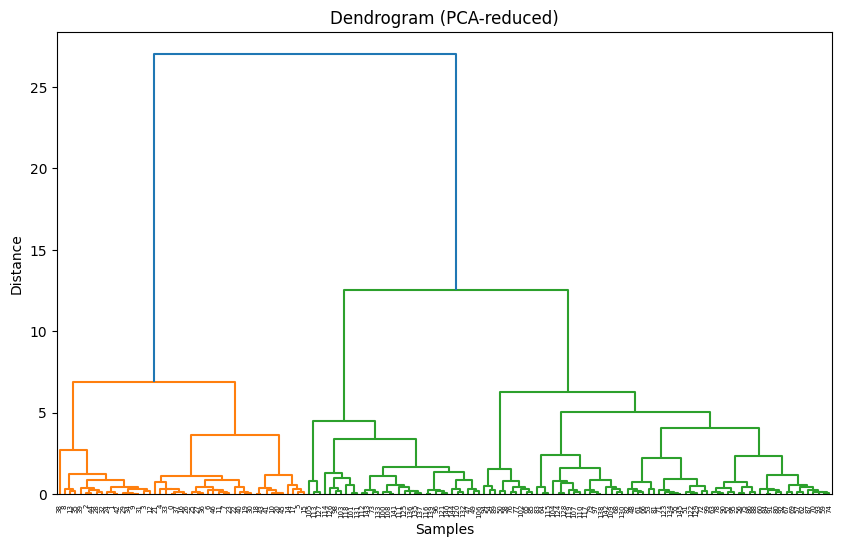

In [21]:
#Heirarchial Cluster
linked = linkage(X_pca, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Dendrogram (PCA-reduced)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Assign clusters
pca_df['Hierarchical_Cluster'] = fcluster(linked, t=3, criterion='maxclust')


##Real-World Applications of Clustering

1. **Customer Segmentation:** Grouping customers by behavior to target ads or offers.
2. **Anomaly Detection:** Spotting unusual patterns like fraud or defects.
3. **Document Grouping:** Organizing news articles or research papers by topic.
4. **Biological Analysis:** Classifying plant or animal species (like the Iris dataset).

Clustering helps find natural patterns in data without needing labels.
